In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Courses\Data-Science_Tech\INeuron_Courses\MACHING_LEARNING_LIVE-CLASS\PROJECT\ML_CODE\ML_Live_Class\data\rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
df.columns = ['signal','density']
df.columns

Index(['signal', 'density'], dtype='object')

<AxesSubplot:xlabel='signal', ylabel='density'>

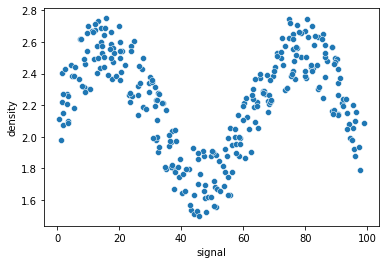

In [7]:
sns.scatterplot(x = 'signal',y='density',data = df)

## Linear Regression

In [18]:
X = df['signal'].values.reshape(-1,1)
y = df['density']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
lr_preds = lr_model.predict(X_test)

In [26]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [30]:
RMSE = np.sqrt(mean_squared_error(y_test,lr_preds))
RMSE

0.2570051996584629

<AxesSubplot:xlabel='signal', ylabel='density'>

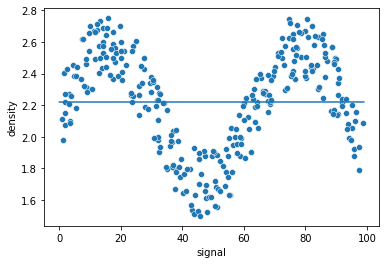

In [32]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
plt.plot(signal_range,signal_preds)
sns.scatterplot(x='signal',y='density',data = df)

## Polynomial Regression

In [33]:
def run_model(model,X_train,y_train,X_test,y_test):

    #Fit model to training data
    model.fit(X_train,y_train)
    #performance Metrics
    preds = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,preds))
    MAE = mean_absolute_error(y_test,preds)
    print(f'RMSE:{RMSE}')
    print(f'MAE:{MAE}')

    #Plot predictions

    signal_range=np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.plot(signal_range,signal_preds)
    sns.scatterplot(x='signal',y='density',data = df)

RMSE:0.2570051996584629
MAE:0.211198973318633


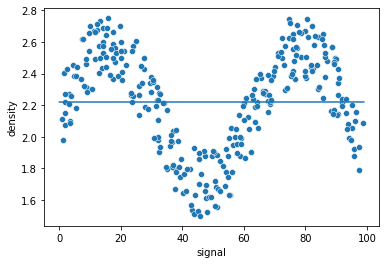

In [36]:

lr_model = LinearRegression()
run_model(lr_model,X_train,y_train,X_test,y_test) #LR is not applicable in this case

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pipe = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())

RMSE:0.287974812791889
MAE:0.2421183403953149


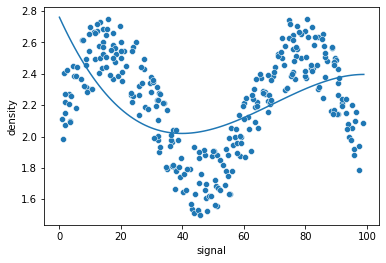

In [39]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE:0.14452813084167157
MAE:0.11864312011579757


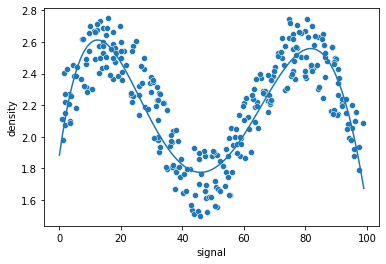

In [40]:
pipe = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [43]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.14026621441401851
MAE:0.12220524225759938


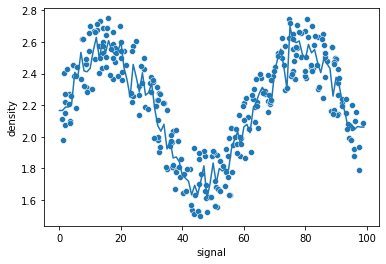

RMSE:0.13730685016923647
MAE:0.12198383614100558


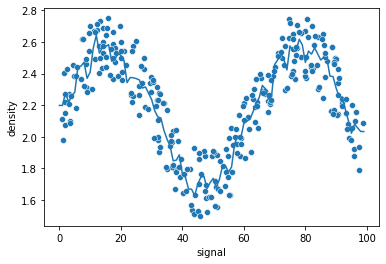

RMSE:0.13895768259318805
MAE:0.12098684435198168


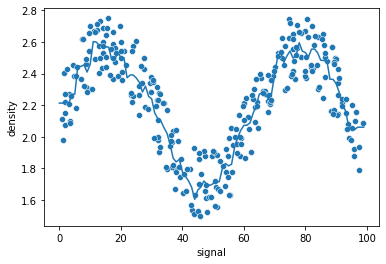

RMSE:0.1341668755221009
MAE:0.11699633935119995


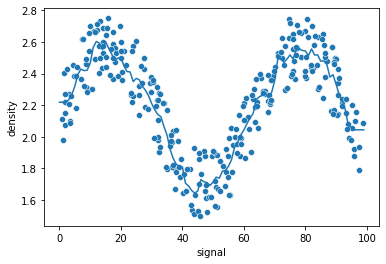

RMSE:0.1295687462413451
MAE:0.1125383655251439


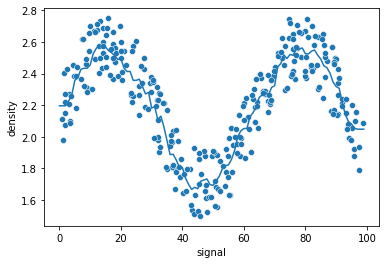

In [46]:
k_values = [3,5,7,9,11]


for i in k_values:
    knn_model=KNeighborsRegressor(n_neighbors = i)
    run_model(knn_model,X_train,y_train,X_test,y_test)
    plt.show()